In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
import time

In [2]:
X,y = load_diabetes(return_X_y=True)
X.shape , y.shape 

((442, 10), (442,))

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [4]:
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.coef_ , reg.intercept_

(array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
        -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
         861.12700152,   52.42112238]),
 np.float64(151.88331005254167))

In [5]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [6]:
class SGDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                
                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [7]:
sgd = SGDRegressor(learning_rate=0.01,epochs=40)

In [8]:
start = time.time()
sgd.fit(X_train,y_train)
print("The time taken is",time.time() - start)

143.24915613705753 [  64.06399077  -41.26801957  320.41676549  219.51273527   28.53588973
   -4.48217786 -167.83996135  136.11471506  287.72550634  128.55395108]
The time taken is 0.3240952491760254


In [9]:
y_pred = sgd.predict(X_test)
r2_score(y_test,y_pred)

0.4064476268248982

In [10]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)

In [11]:
reg.fit(X_train,y_train)

SGDRegressor(learning_rate='constant', max_iter=100)

In [12]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4314903332206933

Visuals


In [13]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [14]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

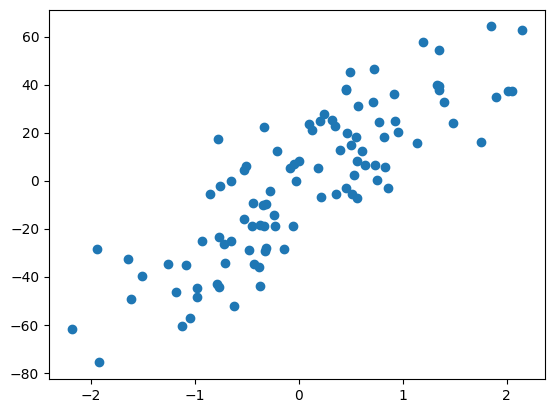

In [15]:
plt.scatter(X,y)

In [16]:
lr = LinearRegression()
lr.fit(X,y)
lr.coef_,lr.intercept_

(array([27.82809103]), np.float64(-2.29474455867698))

In [17]:
import time

b = 150
m = -127.82
all_b = []
all_m = []
all_cost = []
all_lr = []


epochs = 1

start = time.time()

t0,t1 = 5,50
def learning_rate(t):
    return t0/(t + t1)

for i in range(epochs):
    for j in range(X.shape[0]):
        
        lr = learning_rate(i * X.shape[0] + j)
        
        idx = np.random.randint(X.shape[0], size=1)
        
        slope_b = -2 * (y[idx] - (m * X[idx]) -  b)
        slope_m = -2 * (y[idx] - (m * X[idx]) -  b) * X[idx]
        cost = (y[idx] - m * X[idx] -b) ** 2
        
        
        b = b - (lr * slope_b)
        m = m - (lr * slope_m)
        all_b.append(b)
        all_m.append(m)
        all_cost.append(cost)
        all_lr.append(lr)
print("Total time taken",time.time() - start)

Total time taken 0.00677180290222168


In [18]:
len(all_cost)

100

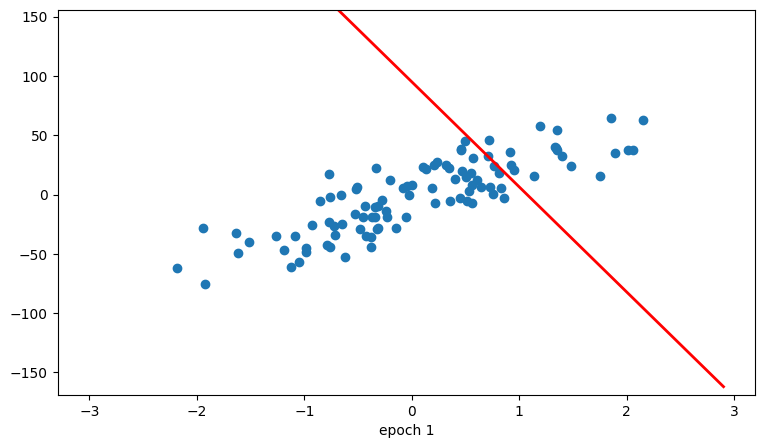

In [19]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, frames=100, interval=5)

f = r"stochastic_animation_line_plot.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

In [20]:

m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)

final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T

z_arr = []

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))

z_arr = np.array(z_arr).reshape(10,10)

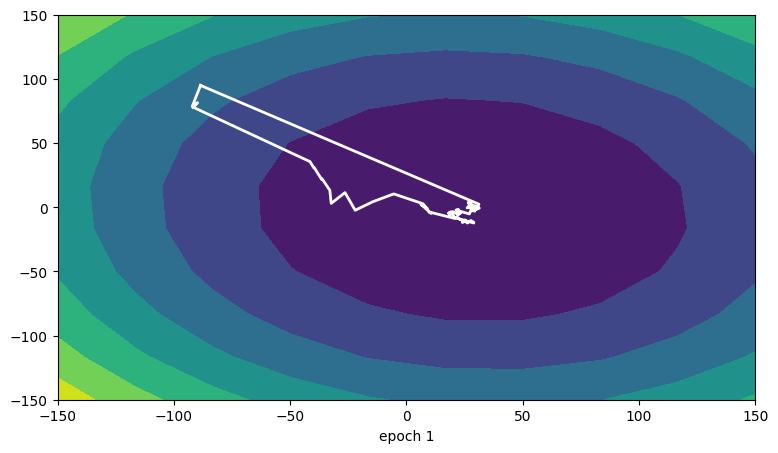

In [21]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(-150, 150), ylim =(-150, 150)) 

axis.contourf(m_arr, b_arr, z_arr)

line, = axis.plot([], [], lw = 2,color='white') 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(all_m[i]) 
    ydata.append(all_b[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 100,repeat=False, interval = 100)
anim
f = r"stochastic_animation_contour_plot.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

In [22]:
all_b[-1],all_m[-1]

(array([[2.35801341]]), array([[31.14900181]]))

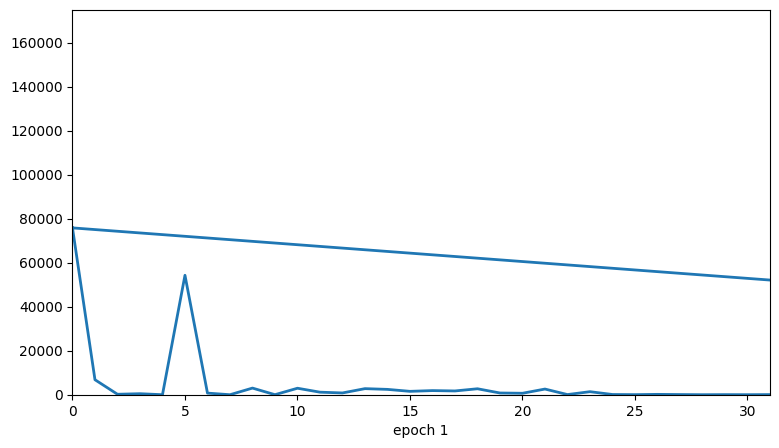

In [23]:
num_epochs = list(range(0,100))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(0, 175000)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_cost[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 100,repeat=False, interval = 150)

f = r"stochastic_animation_cost_plot.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

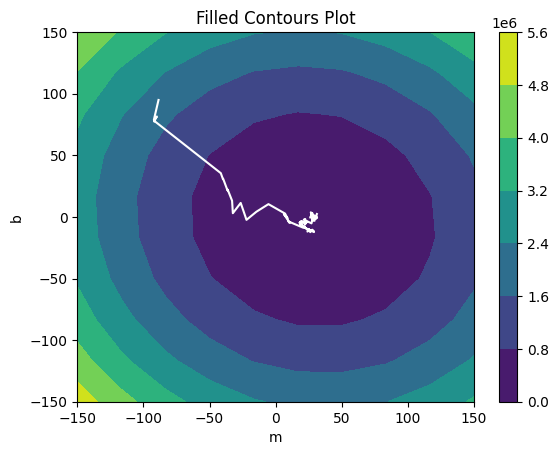

<Figure size 1800x400 with 0 Axes>

In [24]:
import numpy as np
import matplotlib.pyplot as plt


fig,ax=plt.subplots(1,1)
plt.figure(figsize=(18,4))
cp = ax.contourf(m_arr, b_arr, z_arr)
ax.plot(np.array(all_m).ravel(),np.array(all_b).ravel(),color='white')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m')
ax.set_ylabel('b')
plt.show()

In [25]:
all_lr[0] , all_lr[-1]

(0.1, 0.03355704697986577)